In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [5]:
train_df=pd.read_csv('credit_train.csv', index_col=0)

In [8]:
train_df.shape

(150000, 11)

In [9]:
for col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].median())

Distribution of target


0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

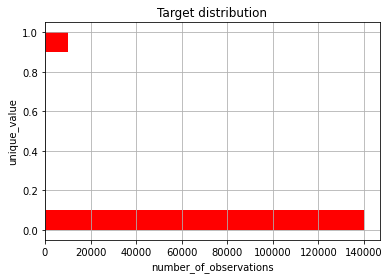

In [13]:
ax = train_df["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of target")
train_df["SeriousDlqin2yrs"].value_counts() / train_df.shape[0]

In [16]:
test_df=pd.read_csv('credit_test.csv')

In [20]:
X_train=train_df.drop('SeriousDlqin2yrs',axis=1)

In [22]:
y_train=train_df.SeriousDlqin2yrs

In [24]:
np.random.seed(0)

<AxesSubplot:>

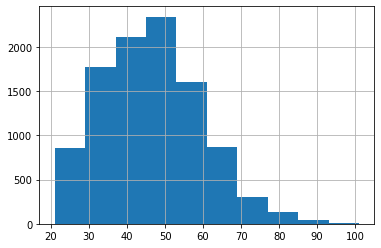

In [29]:
train_df[train_df.SeriousDlqin2yrs==1].age.hist()

In [30]:
from sklearn.linear_model import LogisticRegression as glm

In [31]:
clf=glm(random_state=17)

In [34]:
clf.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=17)

In [37]:
train_df['prob']=clf.predict_proba(X_train)[:,1]

In [42]:
train_df[train_df.prob>=0.9]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,prob
30588,0,0.003032,53,0,5.967504,8000.0,58,0,54,0,0.0,0.961672


In [52]:
clf = glm(random_state=5, class_weight="balanced",max_iter=10000)

In [53]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [46]:
GridSearchCV?

In [54]:
search=GridSearchCV(clf,parameters,scoring='roc_auc',n_jobs=-1)

In [55]:
search.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=5),
             n_jobs=-1, param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             scoring='roc_auc')

In [59]:
best=search.best_estimator_
best.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=10000,
                   random_state=5)

In [58]:
from sklearn.model_selection import cross_val_score

In [95]:
a=cross_val_score(best,X_train,y_train,cv=skf)

In [97]:
a.mean()

0.8567199999999999

In [77]:
pd.DataFrame({'coef':best.coef_[0],'index':list(X_train)})

,coef,index
0,-0.000014,RevolvingUtilizationOfUnsecuredLines
1,-0.013987,age
2,0.487606,NumberOfTime30-59DaysPastDueNotWorse
3,-0.000018,DebtRatio
4,-0.000012,MonthlyIncome
5,0.013421,NumberOfOpenCreditLinesAndLoans
6,0.442596,NumberOfTimes90DaysLate
7,0.020242,NumberRealEstateLoansOrLines
8,0.362537,NumberOfTime60-89DaysPastDueNotWorse
9,0.085268,NumberOfDependents


In [80]:
b=best.coef_[0]

In [78]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) 

In [79]:
softmax(best.coef_[0])

array([0.08524183, 0.08405906, 0.13881091, 0.0852415 , 0.08524205,
       0.08639479, 0.13270156, 0.08698615, 0.12249174, 0.09283042])

In [84]:
b[1]*20

-0.2797375137886585

In [85]:
rf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    oob_score=True,
    class_weight="balanced",
)

## Будем искать лучшие параметры среди следующего набора
parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

In [87]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [88]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [91]:
search.

<generator object _BaseKFold.split at 0x12000258>

In [98]:
a.mean()

0.8567199999999999

In [101]:
search=GridSearchCV(rf,parameters,scoring='roc_auc',n_jobs=-1)

In [109]:
rf = RandomForestClassifier(
    n_estimators=10,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced",
    max_features=2,
    min_samples_leaf=5,
    max_depth=10
)

In [110]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=2,
                       min_samples_leaf=5, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [121]:
X_train,X_test,y_train,y_test=train_test_split(train_df.drop('SeriousDlqin2yrs',axis=1),train_df.SeriousDlqin2yrs)

In [122]:
pred=rf.predict(X_test)

ValueError: X has 11 features, but DecisionTreeClassifier is expecting 10 features as input.

In [123]:
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,prob
5706,0.006648,33,0,0.063989,6000.0,6,0,0,0,3.0,0.148881
55903,0.072782,53,0,0.289662,3075.0,3,0,1,0,0.0,0.051949
46491,0.917246,35,1,0.287329,8933.0,10,0,1,0,2.0,0.147181
1613,1.034894,39,0,0.439363,9729.0,10,0,1,0,3.0,0.105138
94517,0.441571,49,0,0.097492,11600.0,15,0,0,0,1.0,0.041815
...,...,...,...,...,...,...,...,...,...,...,...
57285,0.150518,51,0,0.151226,6400.0,4,0,1,0,0.0,0.047985
55719,0.999021,21,0,0.011995,2500.0,2,0,0,0,1.0,0.230701
130012,0.000000,45,1,0.069452,5600.0,9,0,0,0,2.0,0.099607
91841,0.164150,83,0,0.018070,2600.0,2,0,0,0,1.0,0.011892


In [124]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

In [156]:
bag=BaggingClassifier(clf,n_estimators=100,max_features=3,max_samples=0.7,random_state=42)

In [155]:
clf=glm(max_iter=10000)

In [147]:
BaggingClassifier?

In [157]:
bag.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  max_features=3, max_samples=0.7, n_estimators=100,
                  random_state=42)

In [158]:
pred=bag.predict(X_test)

In [159]:
cross_val_score(clf,X_train,y_train,cv=skf)

array([0.93444444, 0.93462222, 0.9352    , 0.93462222, 0.93346667])

In [153]:
skf

StratifiedKFold(n_splits=5, random_state=5, shuffle=True)